![Descripción de la imagen](https://storage.googleapis.com/kaggle-datasets-images/2563039/4354454/316268854fa4d2a8cdf2971adcfd4d9e/dataset-cover.jpeg?t=2022-10-19-20-58-41)

#            ----EDA----
## **Jugadores de la NBA 2022-2023**

Este conjunto de datos contiene estadísticas de jugadores de la NBA de la temporada regular 2022-2023 por partido. Origen: https://www.kaggle.com/datasets/vivovinco/20222023-nba-player-stats-regular/data

Descrpción de las columnas

- Rk: Rango
- Jugador: nombre del jugador
- Pos: Posición
- Edad: Edad del jugador.
- Tm: Equipo
- G: Juegos jugados
- GS: Juegos iniciados
- MP: Minutos jugados por partido
- FG : Tiros de campo por partido
- FGA : Intentos de gol de campo por partido
- FG%: Porcentaje de tiros de campo
- 3P: tiros de campo de 3 puntos por partido
- 3PA: intentos de tiro de campo de 3 puntos por partido
- 3P%: porcentaje de tiros de campo de 3 puntos
- 2P: tiros de campo de 2 puntos por partido
- 2PA: Intentos de tiro de campo de 2 puntos por partido
- 2P%: porcentaje de tiros de campo de 2 puntos
- eFG%: porcentaje de tiros de campo efectivos
- FT : Tiros libres por partido
- FTA: Intentos de tiros libres por partido
- FT%: Porcentaje de tiros libres
- ORB: rebotes ofensivos por partido.
- DRB: rebotes defensivos por partido
- TRB: rebotes totales por partido
- AST: Asistencias por partido
- STL: Robos por juego
- BLK: Bloques por juego
- TOV: Pérdidas de balón por partido
- PF : Faltas personales por partido
- PTS: Puntos por juego

Iniciamos cargando librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max.column',None)

Importación de la base de datos 

In [3]:
df = pd.read_csv('C:\\Users\\user\\Downloads\\Itziar\\NBA.csv', encoding='latin1', sep=";")


Reconocimiento de los datos 

In [4]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,0.5,2.0,0.269,3.0,5.4,0.564,0.521,1.6,2.3,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,0.597,1.1,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,0.0,0.2,0.083,8.0,14.7,0.545,0.541,4.3,5.4,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,1.4,3.9,0.355,1.4,2.7,0.532,0.532,0.9,1.2,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,1.2,3.5,0.353,2.0,3.4,0.591,0.560,1.4,1.9,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [5]:
df.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,0.545,0.1,0.6,0.176,1.9,3.0,0.622,0.561,0.3,0.5,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,0.429,2.1,6.3,0.335,6.1,12.7,0.476,0.485,7.8,8.8,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,0.593,0.3,0.8,0.429,1.4,2.2,0.650,0.648,0.6,0.7,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,0.627,0.0,0.1,0.000,2.5,3.8,0.649,0.627,1.6,2.3,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5
678,539,Ivica Zubac,C,25,LAC,76,76,28.6,4.3,6.8,0.634,0.0,0.0,0.000,4.3,6.7,0.637,0.634,2.2,3.1,0.697,3.1,6.8,9.9,1.0,0.4,1.3,1.5,2.9,10.8


Estructura del conjunto de datos

In [6]:
df.shape

(679, 30)

Clasificación de variables

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      679 non-null    int64  
 1   Player  679 non-null    object 
 2   Pos     679 non-null    object 
 3   Age     679 non-null    int64  
 4   Tm      679 non-null    object 
 5   G       679 non-null    int64  
 6   GS      679 non-null    int64  
 7   MP      679 non-null    float64
 8   FG      679 non-null    float64
 9   FGA     679 non-null    float64
 10  FG%     679 non-null    float64
 11  3P      679 non-null    float64
 12  3PA     679 non-null    float64
 13  3P%     679 non-null    float64
 14  2P      679 non-null    float64
 15  2PA     679 non-null    float64
 16  2P%     679 non-null    float64
 17  eFG%    679 non-null    float64
 18  FT      679 non-null    float64
 19  FTA     679 non-null    float64
 20  FT%     679 non-null    float64
 21  ORB     679 non-null    float64
 22  DR

Revisión de datos faltantes 

In [8]:
df.isna().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

Revisión de valores duplicados

In [9]:
df.duplicated().sum()

0

Descripción general de los datos: 

* El conjunto de datos contiene 679 entradas (jugadores) y diversas variables como edad, juegos jugados, minutos por juego, tiros de campo, porcentajes, rebotes, asistencias, robos, bloqueos, pérdidas, faltas personales y puntos por juego.

* Nuestro dataframe tiene 679 observaciones y 30 columnas. De las 30 variables que contiene, 3 son cualitativas, Player, Pos y Tm y el resto son cuantitativas. No tenemos valores duplicados. 

* Valores faltantes: No hay valores faltantes en ninguna de las columnas, lo que indica que el conjunto de datos está completo.

+ **Estudio Previo** 
Resumen estadistico general del dataframe 

In [10]:
#Resumen Estadístico
summary_statistics =df.describe()
summary_statistics

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,265.976436,26.025037,43.338733,20.069219,19.463476,3.249190,6.920913,0.462190,0.996465,2.782916,0.318141,2.254786,4.138144,0.527147,0.532948,1.366568,1.768630,0.711576,0.842268,2.620177,3.461414,2.011635,0.601767,0.370398,1.067305,1.660677,8.858763
std,154.956296,4.325709,24.727306,25.766359,9.416316,2.362645,4.795709,0.116682,0.862161,2.209427,0.139918,1.906928,3.380598,0.147627,0.114166,1.478315,1.793762,0.224774,0.731867,1.715999,2.281317,1.891472,0.392063,0.367514,0.799478,0.770492,6.631226
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,132.500000,23.000000,22.000000,0.000000,12.150000,1.500000,3.400000,0.415000,0.300000,1.000000,0.286000,0.900000,1.700000,0.484000,0.496000,0.400000,0.600000,0.667000,0.300000,1.400000,1.800000,0.800000,0.300000,0.100000,0.500000,1.200000,4.100000
50%,264.000000,25.000000,45.000000,6.000000,18.800000,2.600000,5.700000,0.454000,0.800000,2.400000,0.346000,1.600000,3.100000,0.535000,0.537000,0.900000,1.200000,0.760000,0.700000,2.300000,3.000000,1.300000,0.500000,0.300000,0.900000,1.600000,6.900000
75%,399.500000,29.000000,65.500000,36.500000,27.550000,4.200000,9.200000,0.505000,1.500000,4.150000,0.388000,3.000000,5.550000,0.594000,0.579000,1.700000,2.300000,0.841000,1.100000,3.400000,4.500000,2.700000,0.800000,0.500000,1.400000,2.200000,11.550000
max,539.000000,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,4.900000,11.400000,1.000000,10.500000,17.800000,1.000000,1.000000,10.000000,12.300000,1.000000,5.100000,9.600000,12.500000,10.700000,3.000000,3.000000,4.100000,5.000000,33.100000


### Analsis Univariante

In [10]:
class Eda:
    def univariante_analysis(self, df, column):
        mean = df[column].mean()
        median = df[column].median()
        mode = df[column].mode()[0]

        plt.figure(figsize=(10, 5))

        # Histograma
        sns.histplot(df[column], bins=30, kde=False)

        # Líneas para la media, mediana y moda
        plt.axvline(mean, color='g', linestyle='-', label=f'mean={mean:.1f}')
        plt.axvline(median, color='r', linestyle='-', label=f'median={median:.1f}')
        plt.axvline(mode, color='purple', linestyle='-', label=f'mode={mode:.1f}')

        plt.legend()
        plt.title(f'Análisis de {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        plt.show()

In [11]:
print(df.columns)

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


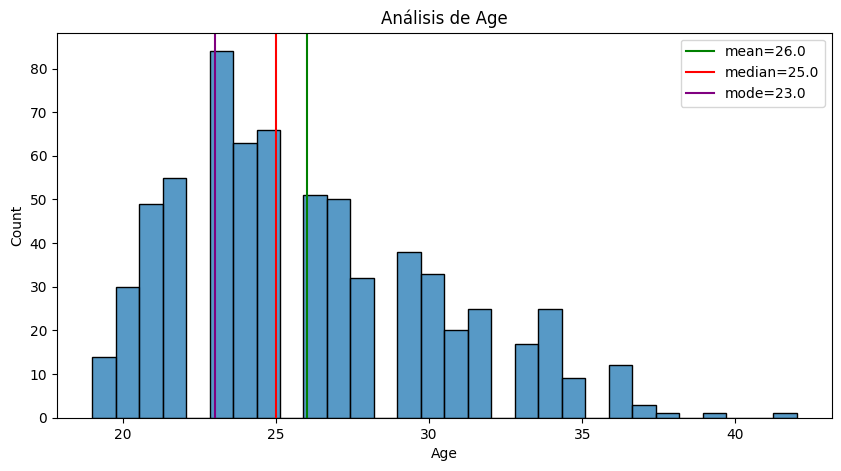

In [12]:
eda = Eda()
eda.univariante_analysis(df, 'Age')

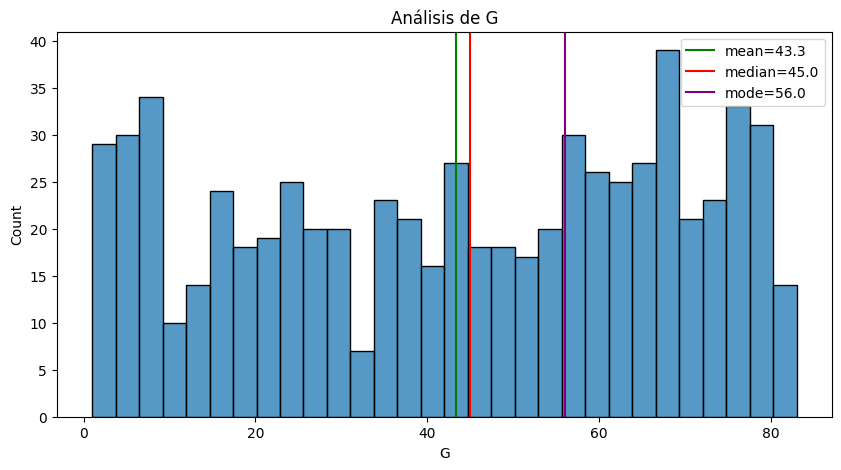

In [15]:
eda = Eda()
eda.univariante_analysis(df, 'G')

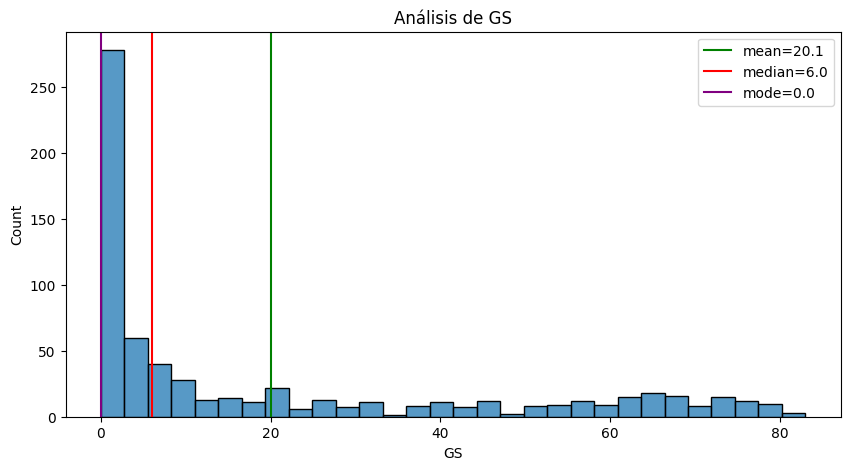

In [16]:
eda = Eda()
eda.univariante_analysis(df, 'GS')

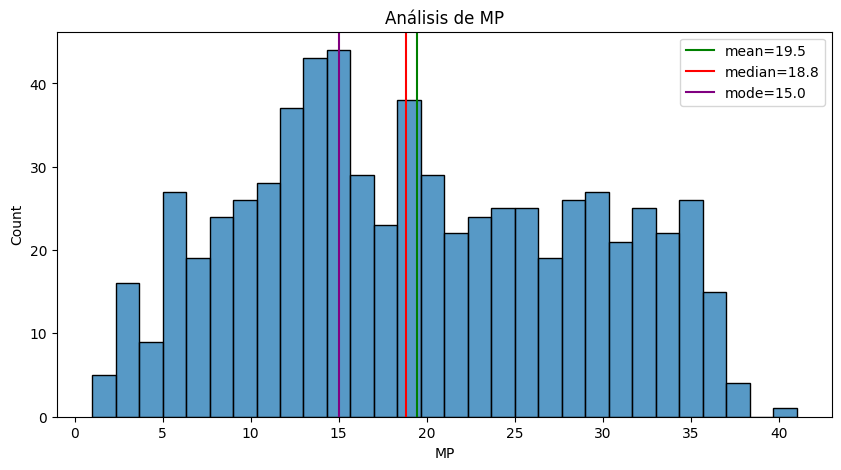

In [17]:
eda = Eda()
eda.univariante_analysis(df, 'MP')

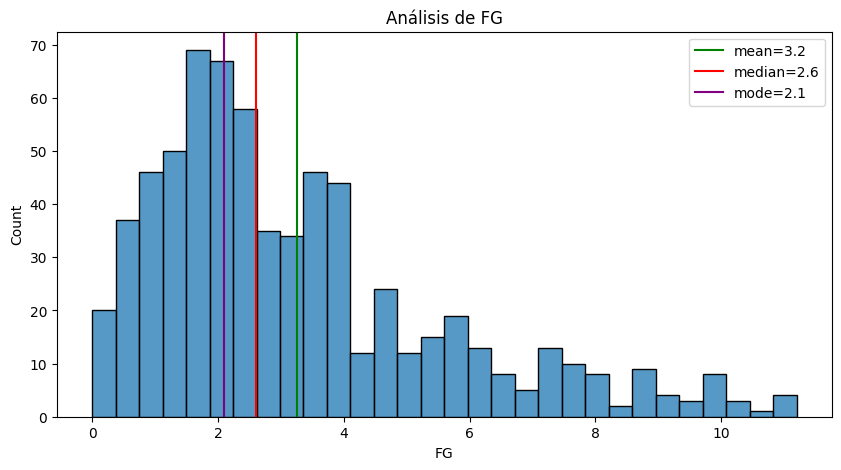

In [18]:
eda = Eda()
eda.univariante_analysis(df, 'FG')

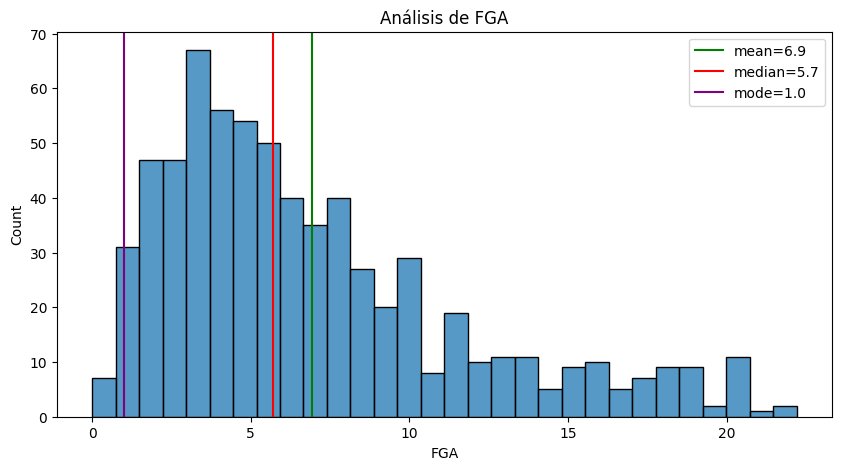

In [19]:
eda = Eda()
eda.univariante_analysis(df, 'FGA')

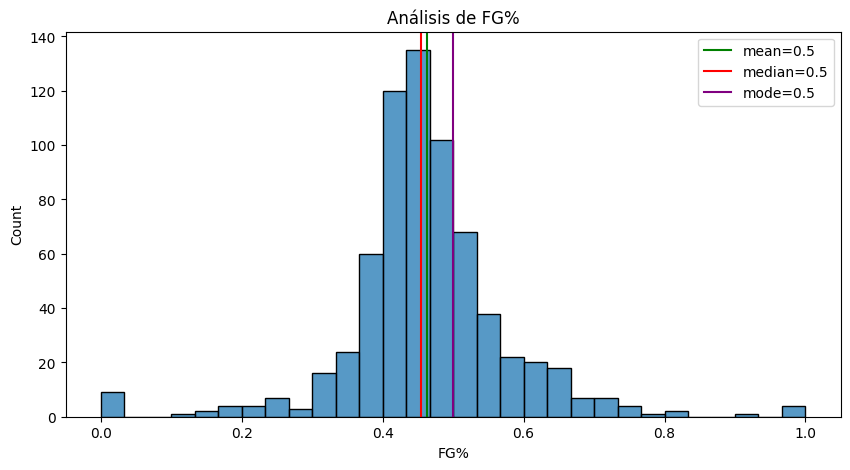

In [20]:
eda = Eda()
eda.univariante_analysis(df, 'FG%')

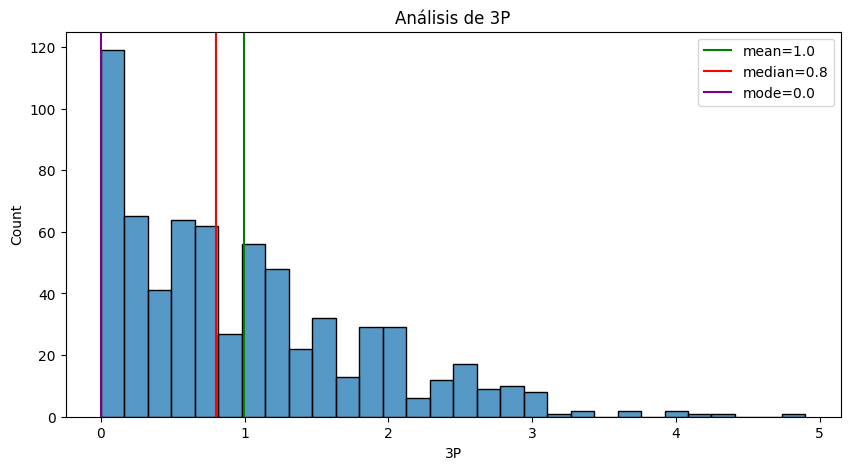

In [21]:
eda = Eda()
eda.univariante_analysis(df, '3P')

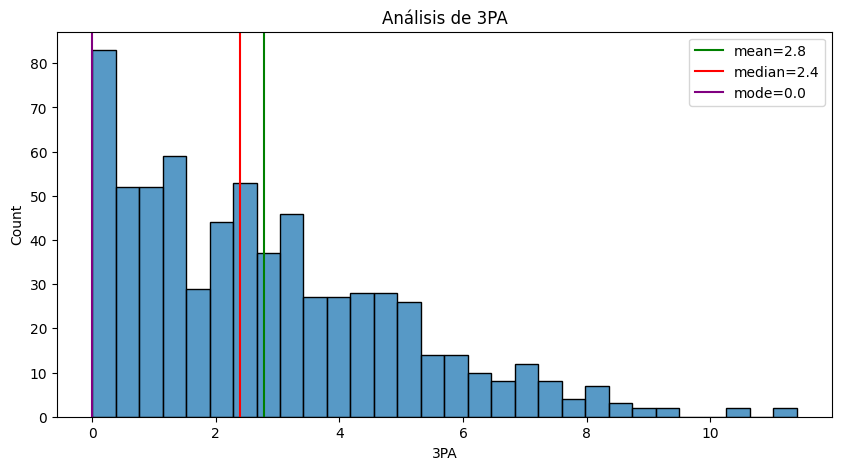

In [22]:
eda = Eda()
eda.univariante_analysis(df, '3PA')

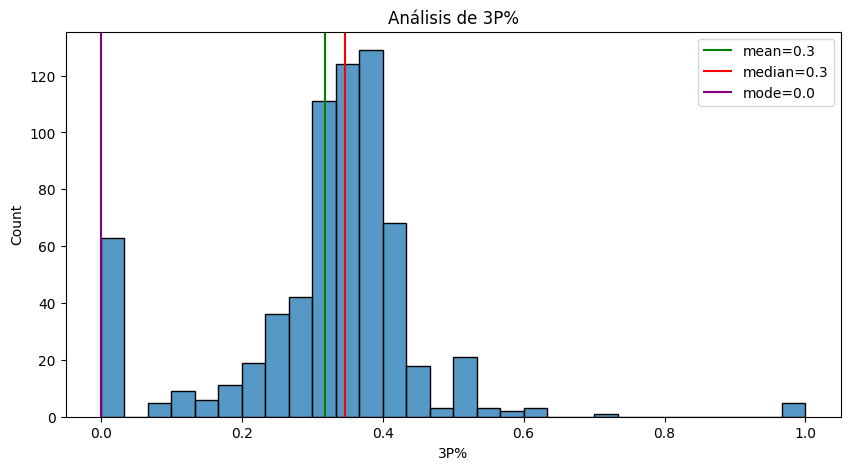

In [23]:
eda = Eda()
eda.univariante_analysis(df, '3P%')

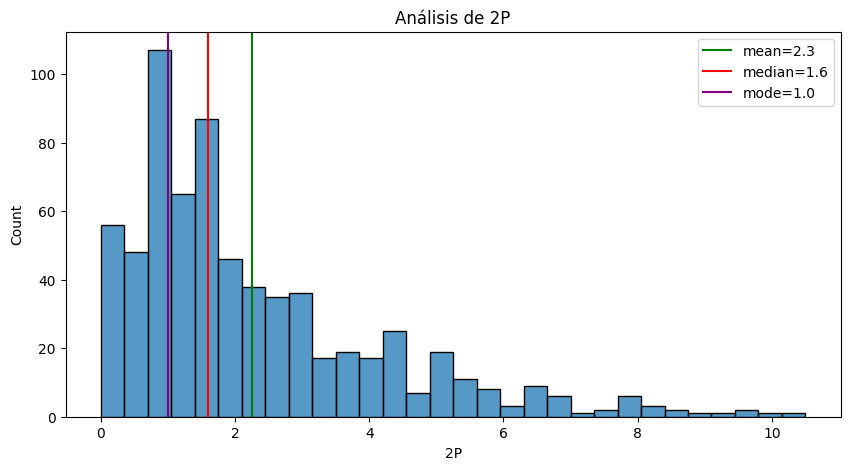

In [24]:
eda = Eda()
eda.univariante_analysis(df, '2P')

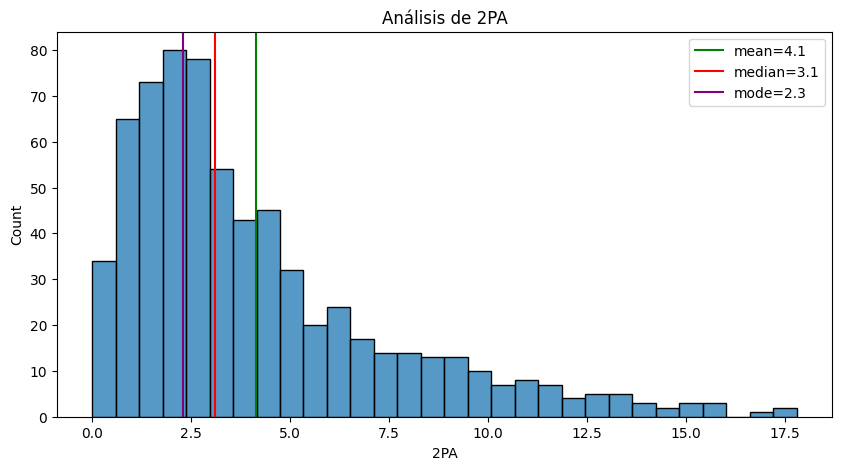

In [25]:
eda = Eda()
eda.univariante_analysis(df, '2PA')

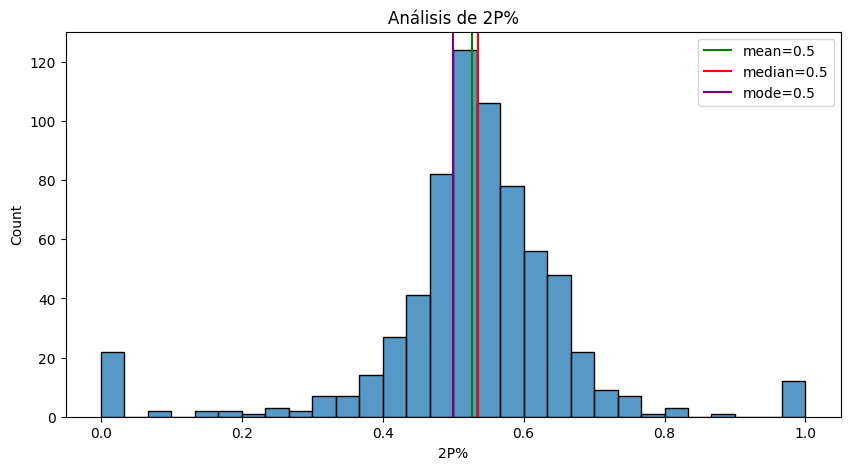

In [26]:
eda = Eda()
eda.univariante_analysis(df, '2P%')

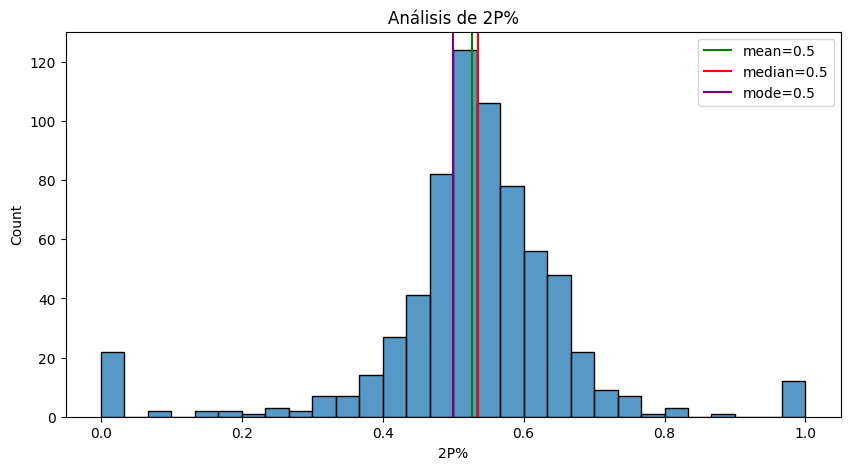

In [27]:
eda = Eda()
eda.univariante_analysis(df, '2P%')

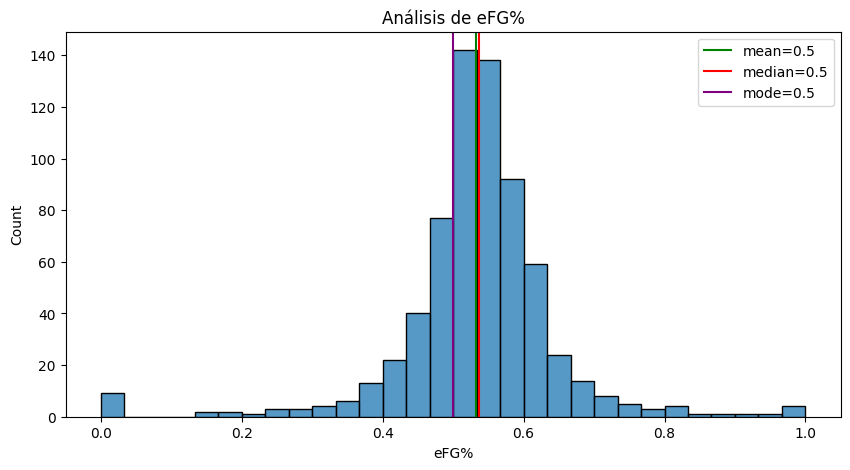

In [28]:
eda = Eda()
eda.univariante_analysis(df, 'eFG%')

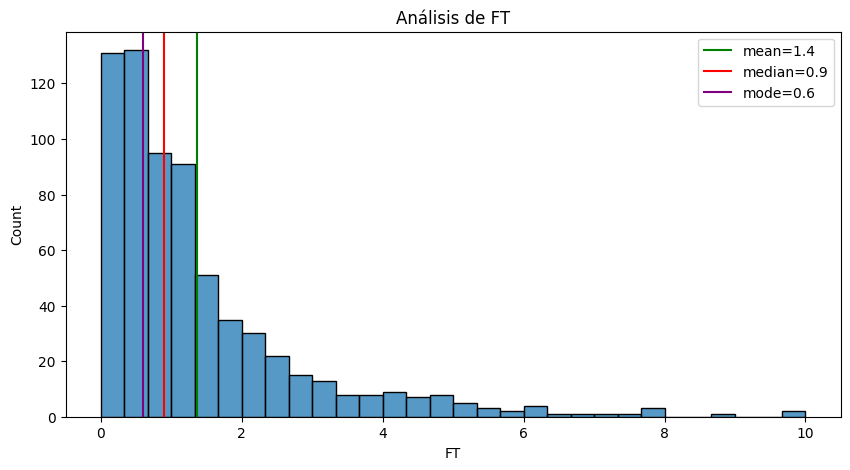

In [29]:
eda = Eda()
eda.univariante_analysis(df, 'FT')

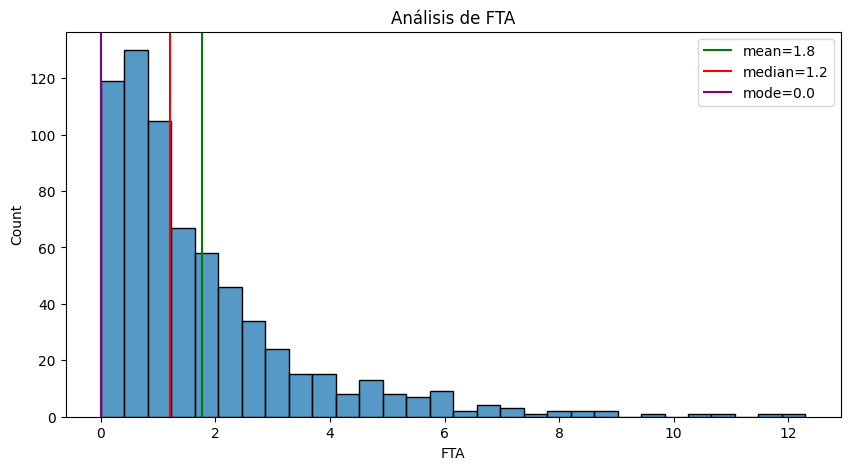

In [30]:
eda = Eda()
eda.univariante_analysis(df, 'FTA')

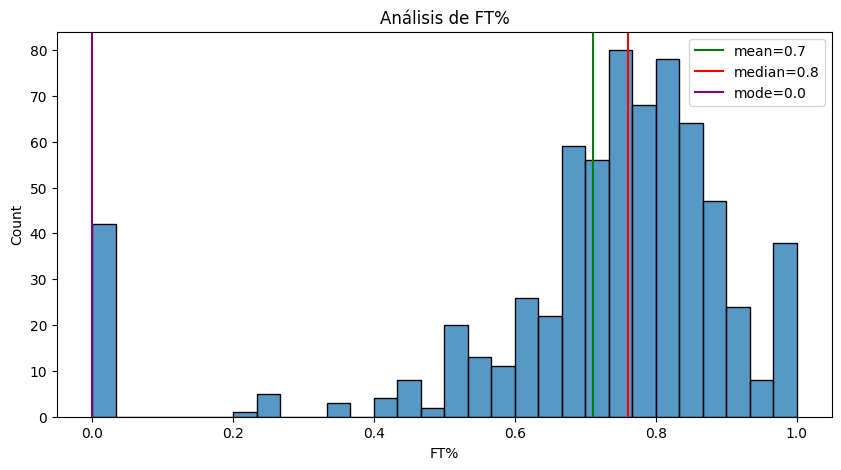

In [31]:
eda = Eda()
eda.univariante_analysis(df, 'FT%')

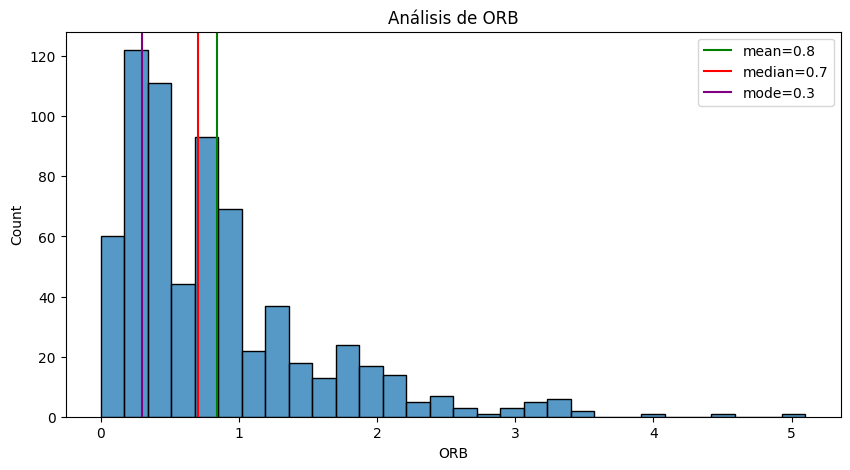

In [32]:
eda = Eda()
eda.univariante_analysis(df, 'ORB')

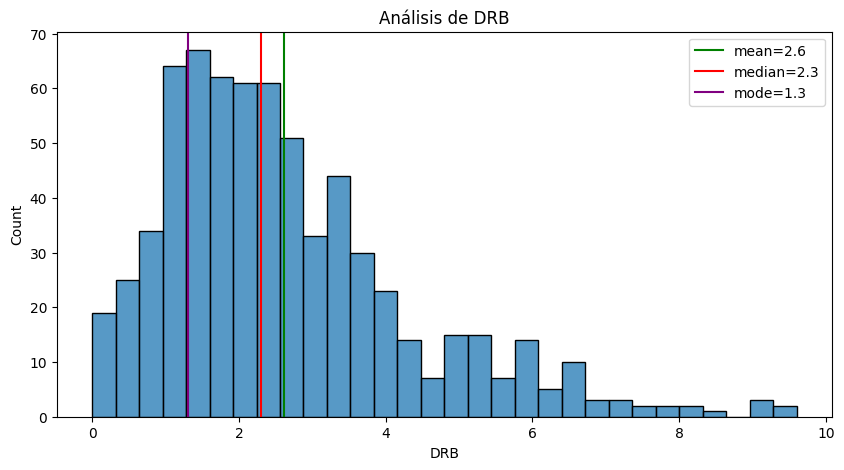

In [33]:
eda = Eda()
eda.univariante_analysis(df, 'DRB')

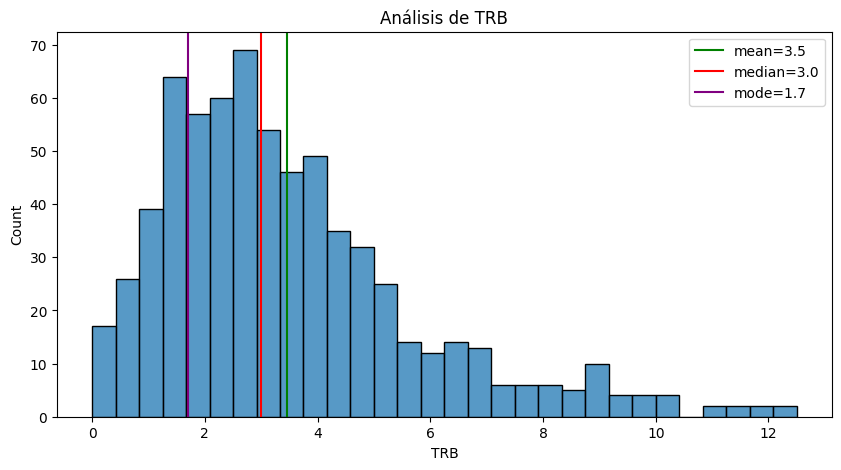

In [34]:
eda = Eda()
eda.univariante_analysis(df, 'TRB')

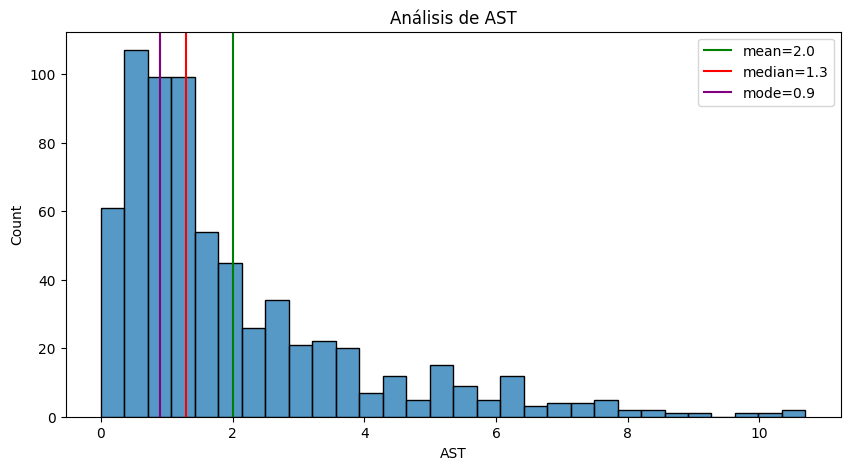

In [35]:
eda = Eda()
eda.univariante_analysis(df, 'AST')

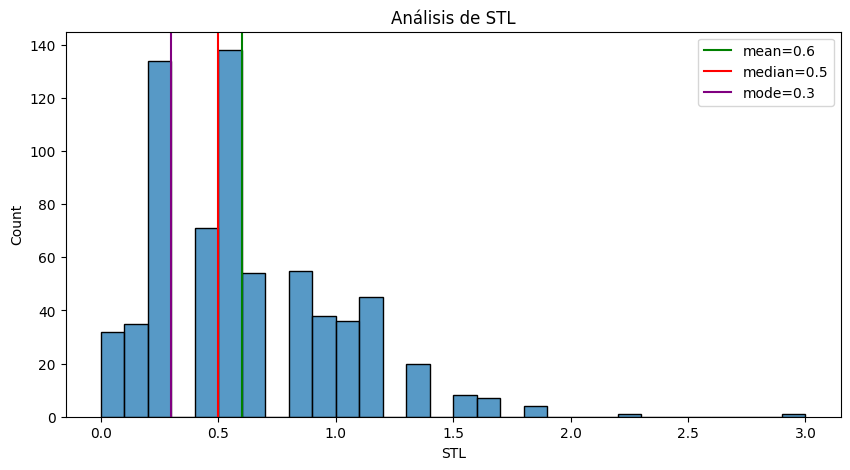

In [36]:
eda = Eda()
eda.univariante_analysis(df, 'STL')

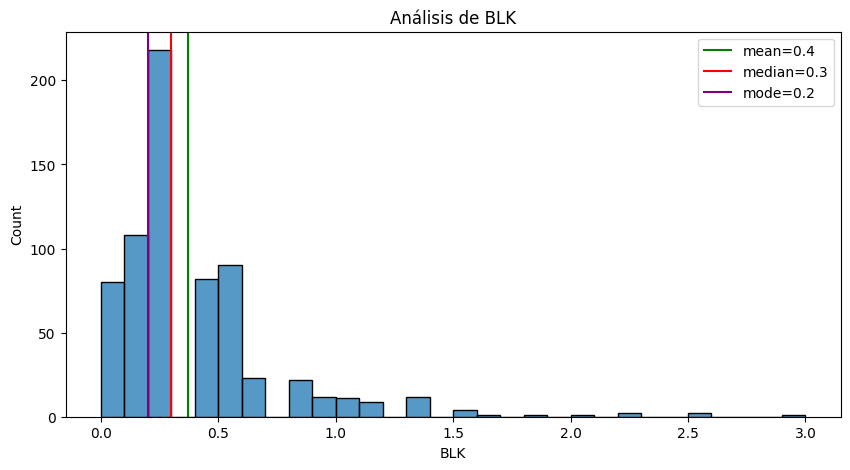

In [37]:
eda = Eda()
eda.univariante_analysis(df, 'BLK')

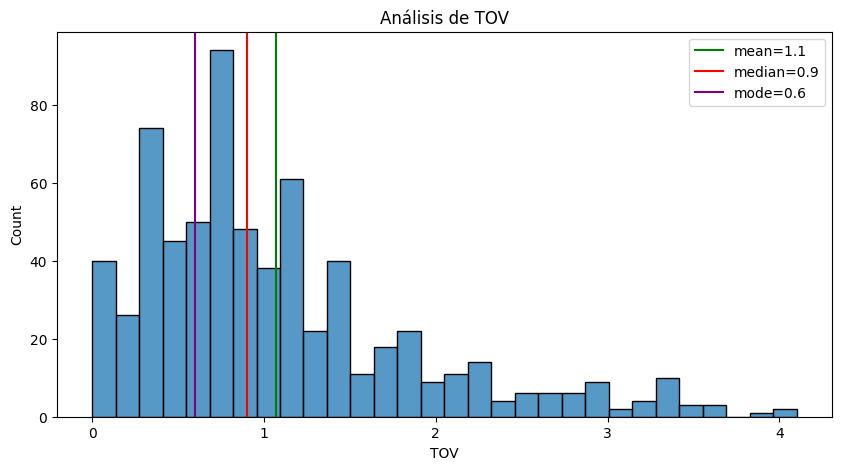

In [38]:
eda = Eda()
eda.univariante_analysis(df, 'TOV')

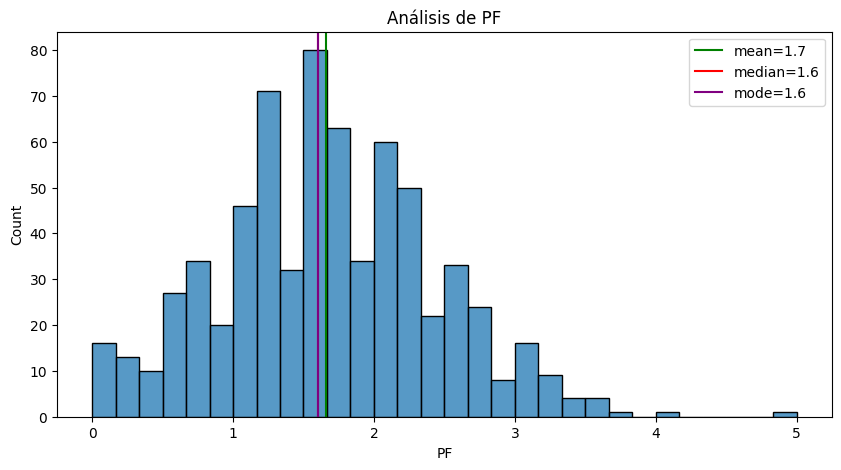

In [39]:
eda = Eda()
eda.univariante_analysis(df, 'PF')

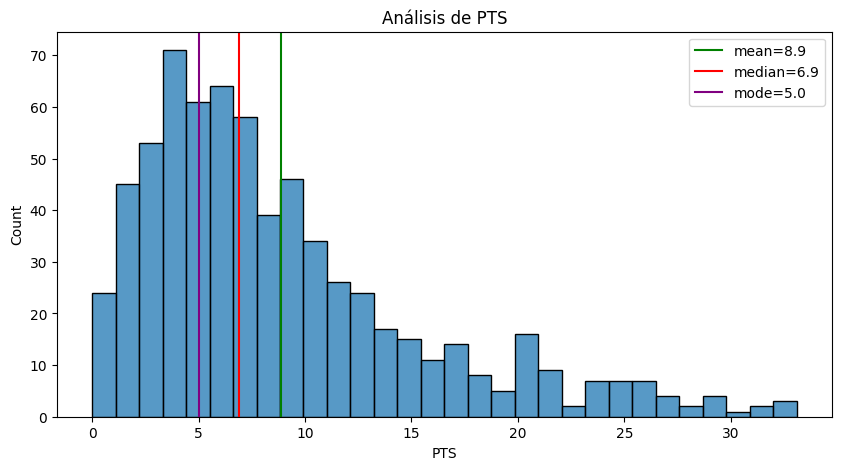

In [40]:
eda = Eda()
eda.univariante_analysis(df, 'PTS')

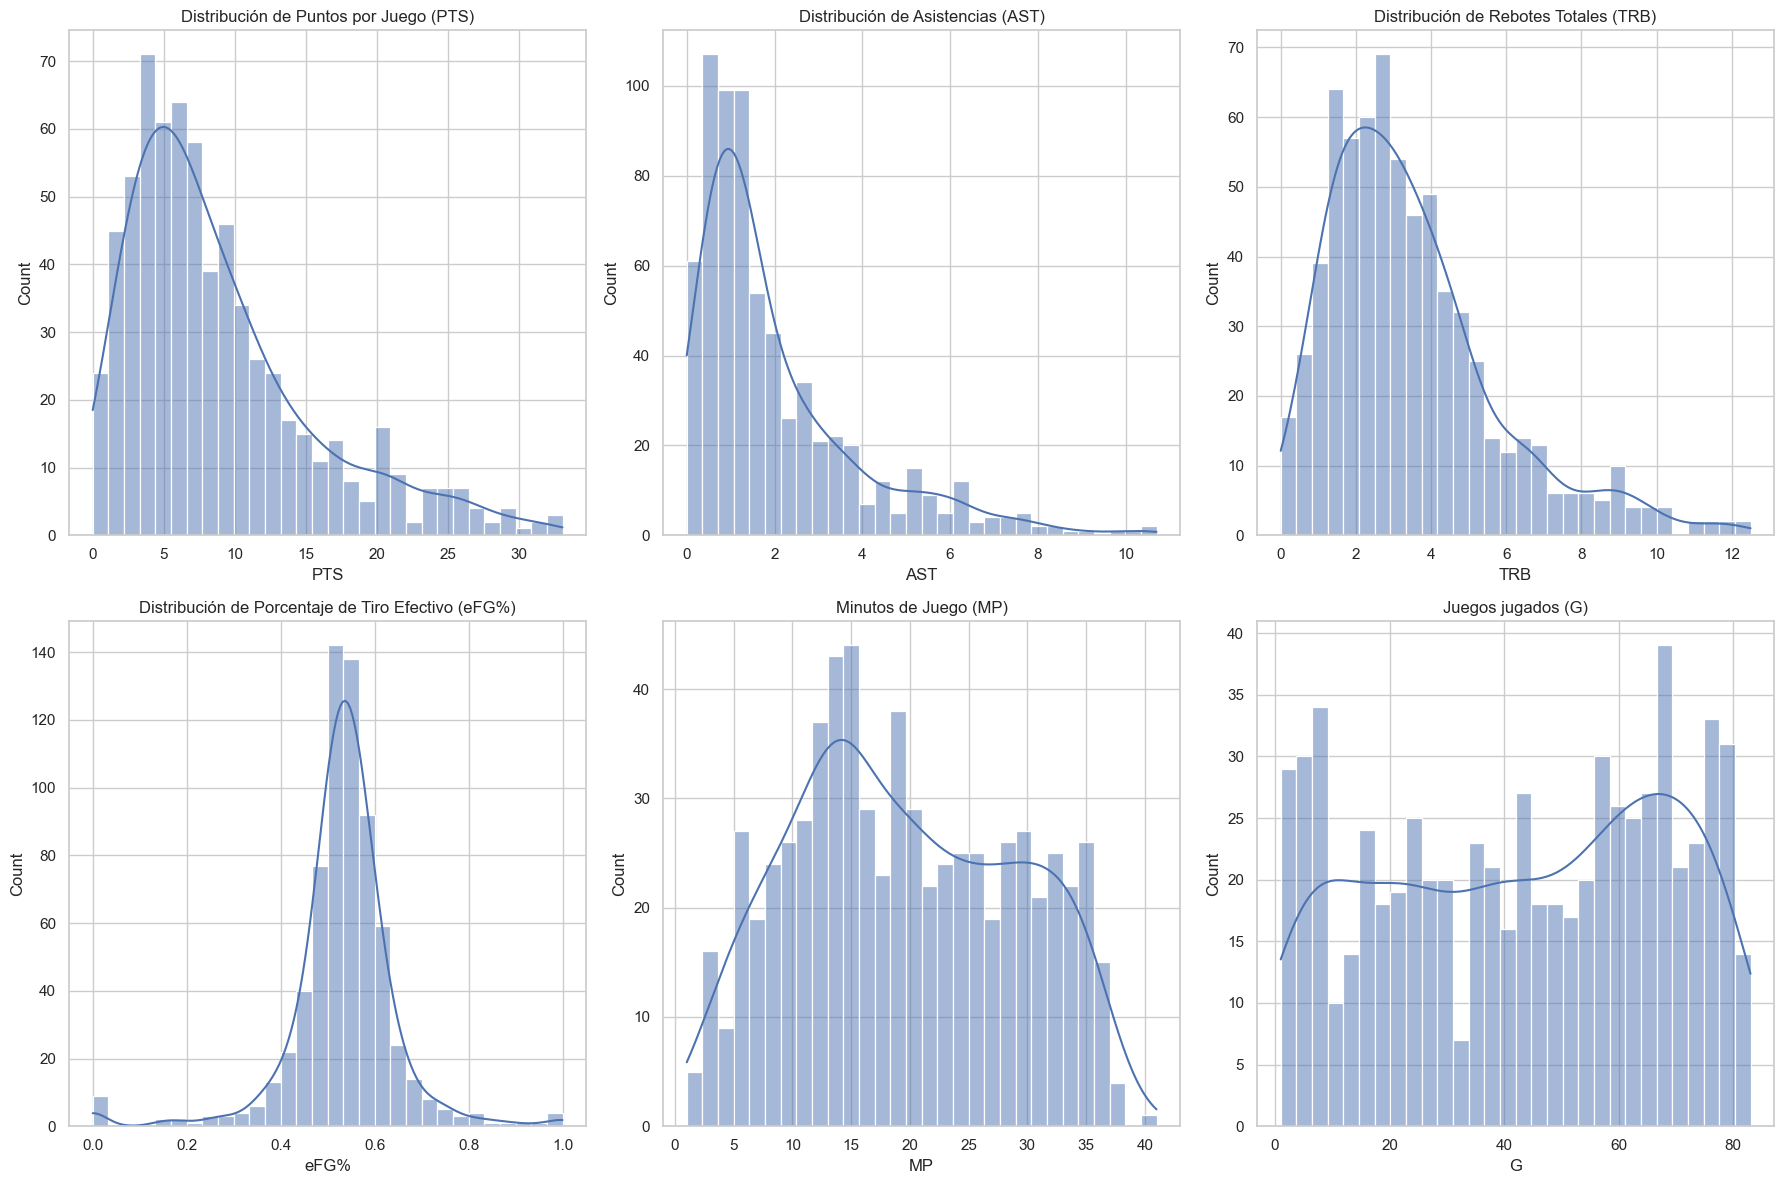

In [23]:
# Configuración de estilos para los gráficos
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Distribución de Puntos por Juego (PTS)
sns.histplot(df['PTS'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribución de Puntos por Juego (PTS)')

# Distribución de Asistencias (AST)
sns.histplot(df['AST'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribución de Asistencias (AST)')

# Distribución de Rebotes Totales (TRB)
sns.histplot(df['TRB'], bins=30, ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Distribución de Rebotes Totales (TRB)')

# Distribución de Porcentaje de Tiro Efectivo (eFG%)
sns.histplot(df['eFG%'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribución de Porcentaje de Tiro Efectivo (eFG%)')

# Distribución de Eficiencia (EFF)
sns.histplot(df['MP'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Minutos de Juego (MP)')

# Distribución de Eficiencia (EFF)
sns.histplot(df['G'], bins=30, ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Juegos jugados (G)')

plt.tight_layout()
plt.show()

Los gráficos de distribución proporcionan una visión general de cómo se distribuyen varias estadísticas clave entre los jugadores de la NBA:

* Puntos por Juego (PTS): La mayoría de los jugadores anotan menos de 20 puntos por juego, con una concentración en el rango bajo.
* Asistencias (AST): Similar a los puntos, la mayoría de los jugadores tienen un número bajo de asistencias por juego, con una distribución sesgada hacia la derecha.
* Rebotes Totales (TRB): La distribución de rebotes totales muestra un patrón similar, con la mayoría de los jugadores capturando un número moderado de rebotes por juego.
* Porcentaje de Tiro Efectivo (eFG%): La distribución de eFG% muestra una curva más simétrica, con la mayoría de los jugadores teniendo un porcentaje alrededor del 45% al 55%.
* Eficiencia (EFF): La eficiencia tiene una distribución que se inclina hacia valores más bajos, con una cola más larga hacia valores más altos.
* Los minutos jugados parece aproximarse a una distribución normal, donde la mayoría de los jugadores tienen una cantidad de minutos jugados que se encuentra alrededor del valor más frecuente (que sería la moda de la distribución).
El punto más alto del histograma está alrededor de los 20 a 25 minutos, sugiriendo que esa es la cantidad de minutos más comúnmente jugados por los jugadores.
La distribución muestra una cola hacia la derecha, indicando que hay jugadores que han jugado muchos más minutos que el promedio. La cola a la izquierda es menos pronunciada, lo que indica que hay menos jugadores que juegan muy pocos minutos.
* La distribución de los juegos jugados no es simétrica y parece estar sesgada hacia la derecha, indicando que hay más jugadores que han participado en un número menor de juegos.
Hay varios picos, lo que podría indicar una distribución multimodal. Esto puede suceder si hay subgrupos dentro de la población de jugadores que tienden a jugar un número característico de juegos. Por ejemplo, algunos jugadores pueden ser constantemente seleccionados para jugar casi todos los juegos, mientras que otros pueden participar solo ocasionalmente.
Existe una cola larga hacia la derecha que muestra que algunos jugadores han participado en muchos más juegos que la mayoría. La cola hacia la izquierda es mínima, lo que sugiere que casi todos los jugadores han participado en algunos juegos.

In [41]:
for i in df:
    print(i)
    print('--'*50)
    print(df[i].describe())
    print('--'*50)
    

Rk
----------------------------------------------------------------------------------------------------
count    679.000000
mean     265.976436
std      154.956296
min        1.000000
25%      132.500000
50%      264.000000
75%      399.500000
max      539.000000
Name: Rk, dtype: float64
----------------------------------------------------------------------------------------------------
Player
----------------------------------------------------------------------------------------------------
count                     679
unique                    539
top       Dorian Finney-Smith
freq                        3
Name: Player, dtype: object
----------------------------------------------------------------------------------------------------
Pos
----------------------------------------------------------------------------------------------------
count     679
unique      8
top        SG
freq      168
Name: Pos, dtype: object
-------------------------------------------------------------------

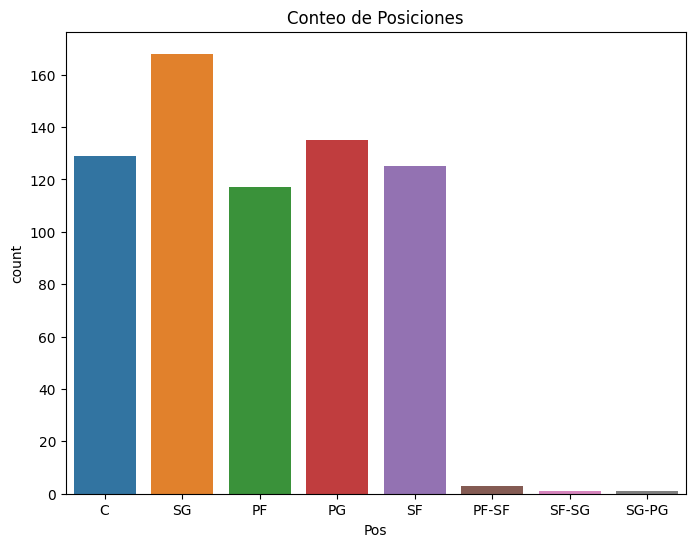

Conteo de valores:
Pos
SG       168
PG       135
C        129
SF       125
PF       117
PF-SF      3
SF-SG      1
SG-PG      1
Name: count, dtype: int64
Porcentaje de valores:
Pos
SG       24.742268
PG       19.882180
C        18.998527
SF       18.409426
PF       17.231222
PF-SF     0.441826
SF-SG     0.147275
SG-PG     0.147275
Name: proportion, dtype: float64


In [45]:
conteo = df['Pos'].value_counts()
porcentaje = df['Pos'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6)) 
sns.countplot(x='Pos', data=df) 
plt.title('Conteo de Posiciones') 
plt.show() 

print("Conteo de valores:")
print(conteo)
print("Porcentaje de valores:")
print(porcentaje)


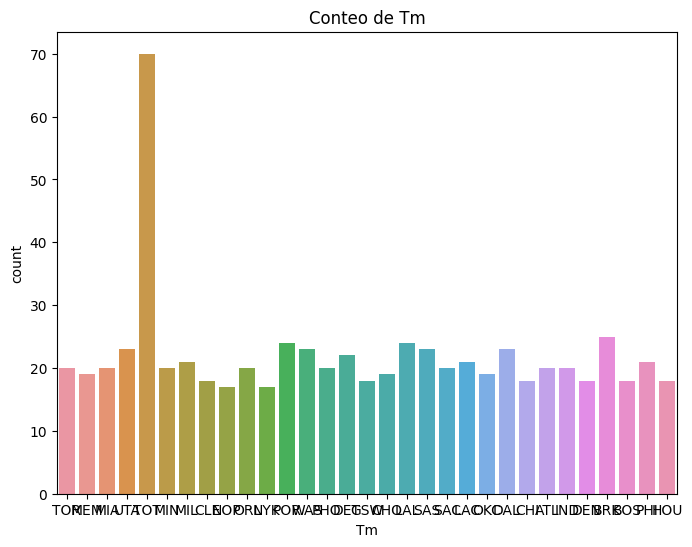

Conteo de valores:
Tm
TOT    70
BRK    25
POR    24
LAL    24
WAS    23
DAL    23
UTA    23
SAS    23
DET    22
LAC    21
MIL    21
PHI    21
SAC    20
TOR    20
PHO    20
IND    20
ORL    20
MIN    20
MIA    20
ATL    20
MEM    19
CHO    19
OKC    19
BOS    18
DEN    18
GSW    18
CHI    18
CLE    18
HOU    18
NYK    17
NOP    17
Name: count, dtype: int64
Porcentaje de valores:
Tm
TOT    10.309278
BRK     3.681885
POR     3.534610
LAL     3.534610
WAS     3.387334
DAL     3.387334
UTA     3.387334
SAS     3.387334
DET     3.240059
LAC     3.092784
MIL     3.092784
PHI     3.092784
SAC     2.945508
TOR     2.945508
PHO     2.945508
IND     2.945508
ORL     2.945508
MIN     2.945508
MIA     2.945508
ATL     2.945508
MEM     2.798233
CHO     2.798233
OKC     2.798233
BOS     2.650957
DEN     2.650957
GSW     2.650957
CHI     2.650957
CLE     2.650957
HOU     2.650957
NYK     2.503682
NOP     2.503682
Name: proportion, dtype: float64


In [44]:

conteo = df['Tm'].value_counts()
porcentaje = df['Tm'].value_counts(normalize=True) * 100


plt.figure(figsize=(8, 6)) 
sns.countplot(x='Tm', data=df)
plt.title('Conteo de Tm') 
plt.show()

print("Conteo de valores:")
print(conteo)
print("Porcentaje de valores:")
print(porcentaje)


### Análisis Bivariado

In [13]:
df['Age_Cat'] = pd.cut(df['Age'],
                         bins=[10, 23, 29, float('inf')],
                         labels=['Joven', 'Mediana Edad', 'Mayor'])


In [14]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Age_Cat
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,0.5,2.0,0.269,3.0,5.4,0.564,0.521,1.6,2.3,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,Joven
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,0.597,1.1,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,Mediana Edad
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,0.0,0.2,0.083,8.0,14.7,0.545,0.541,4.3,5.4,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,Mediana Edad
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,1.4,3.9,0.355,1.4,2.7,0.532,0.532,0.9,1.2,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,Joven
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,1.2,3.5,0.353,2.0,3.4,0.591,0.560,1.4,1.9,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,Joven


+ **Exploración de jugadores**



In [11]:
 
most_games = df[['Player', 'G']].sort_values(by='G', ascending=False).head(10)
most_games

,Player,G
77,Mikal Bridges,83
32,Harrison Barnes,82
660,Patrick Williams,82
178,Tari Eason,82
396,Kenyon Martin Jr.,82
646,Derrick White,82
257,Isaiah Hartenstein,82
622,Nikola Vu?evi?,82
497,Jordan Poole,82
377,Kevon Looney,82


Análisis del mejor jugador 


In [18]:
mikal = df[df['Player'] == 'Mikal Bridges']
mikal

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Age_Cat
77,58,Mikal Bridges,SF,26,TOT,83,83,35.7,7.1,15.3,0.468,2.0,5.3,0.382,5.1,9.9,0.514,0.535,3.8,4.3,0.895,1.0,3.4,4.4,3.3,1.1,0.7,1.5,1.9,20.1,Mediana Edad
78,58,Mikal Bridges,SF,26,PHO,56,56,36.4,6.3,13.6,0.463,1.8,4.7,0.387,4.5,9.0,0.503,0.529,2.8,3.1,0.897,1.0,3.3,4.3,3.6,1.2,0.8,1.4,2.1,17.2,Mediana Edad
79,58,Mikal Bridges,SF,26,BRK,27,27,34.2,8.9,18.6,0.475,2.5,6.7,0.376,6.3,11.9,0.531,0.543,5.9,6.6,0.894,0.9,3.6,4.5,2.7,1.0,0.6,1.8,1.6,26.1,Mediana Edad


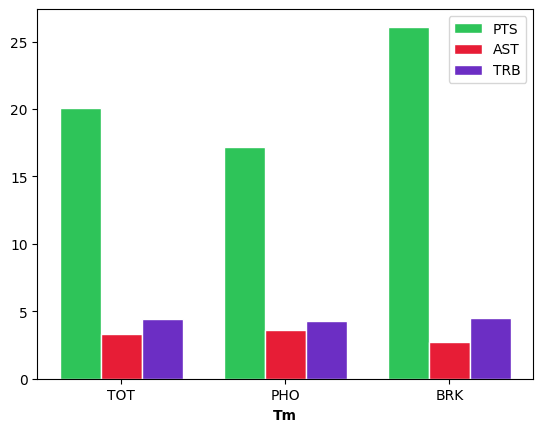

In [19]:
bar_width = 0.25

r1 = np.arange(len(mikal['PTS']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, mikal['PTS'], color='#2ec459', width=bar_width, edgecolor='white', label='PTS')
plt.bar(r2, mikal['AST'], color='#e71d36', width=bar_width, edgecolor='white', label='AST')
plt.bar(r3, mikal['TRB'], color='#6c2ec4', width=bar_width, edgecolor='white', label='TRB')

plt.xlabel('Tm', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(mikal['G']))], mikal['Tm'])

plt.legend()
plt.show()



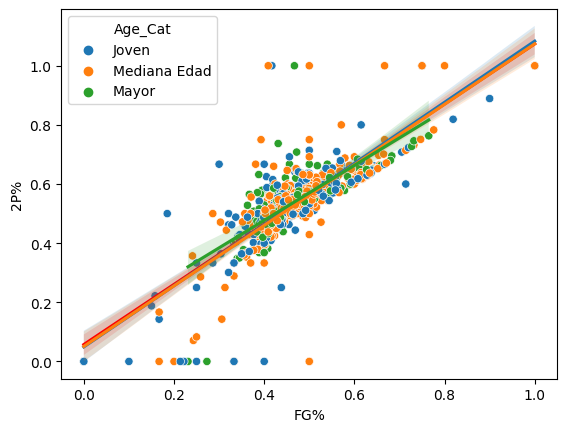

In [20]:
sns.scatterplot(data=df, x='FG%', y='2P%',hue='Age_Cat');
sns.regplot(x='FG%', y='2P%', data=df, scatter=False, color='red');

for group in df['Age_Cat'].unique():
    sns.regplot(x='FG%', y='2P%', data=df[df['Age_Cat'] == group], scatter=False, label=f'Reg: {group}')

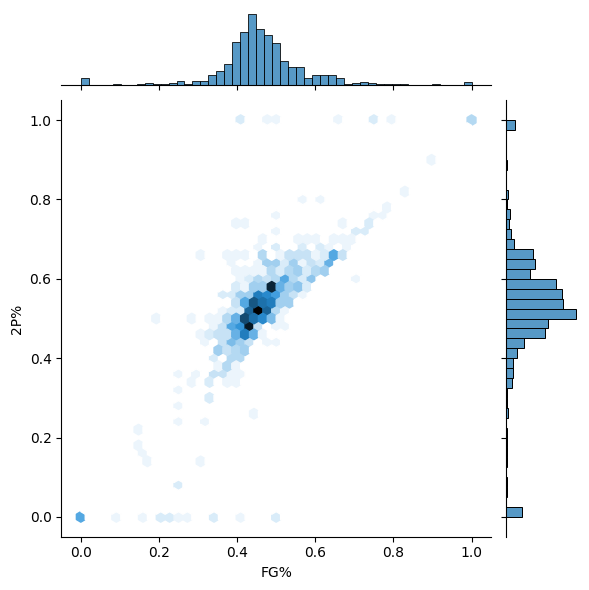

In [21]:
sns.jointplot(data=df, x='FG%', y='2P%', kind='hex');

Análisis Multivariado

Análisis de Correlación 

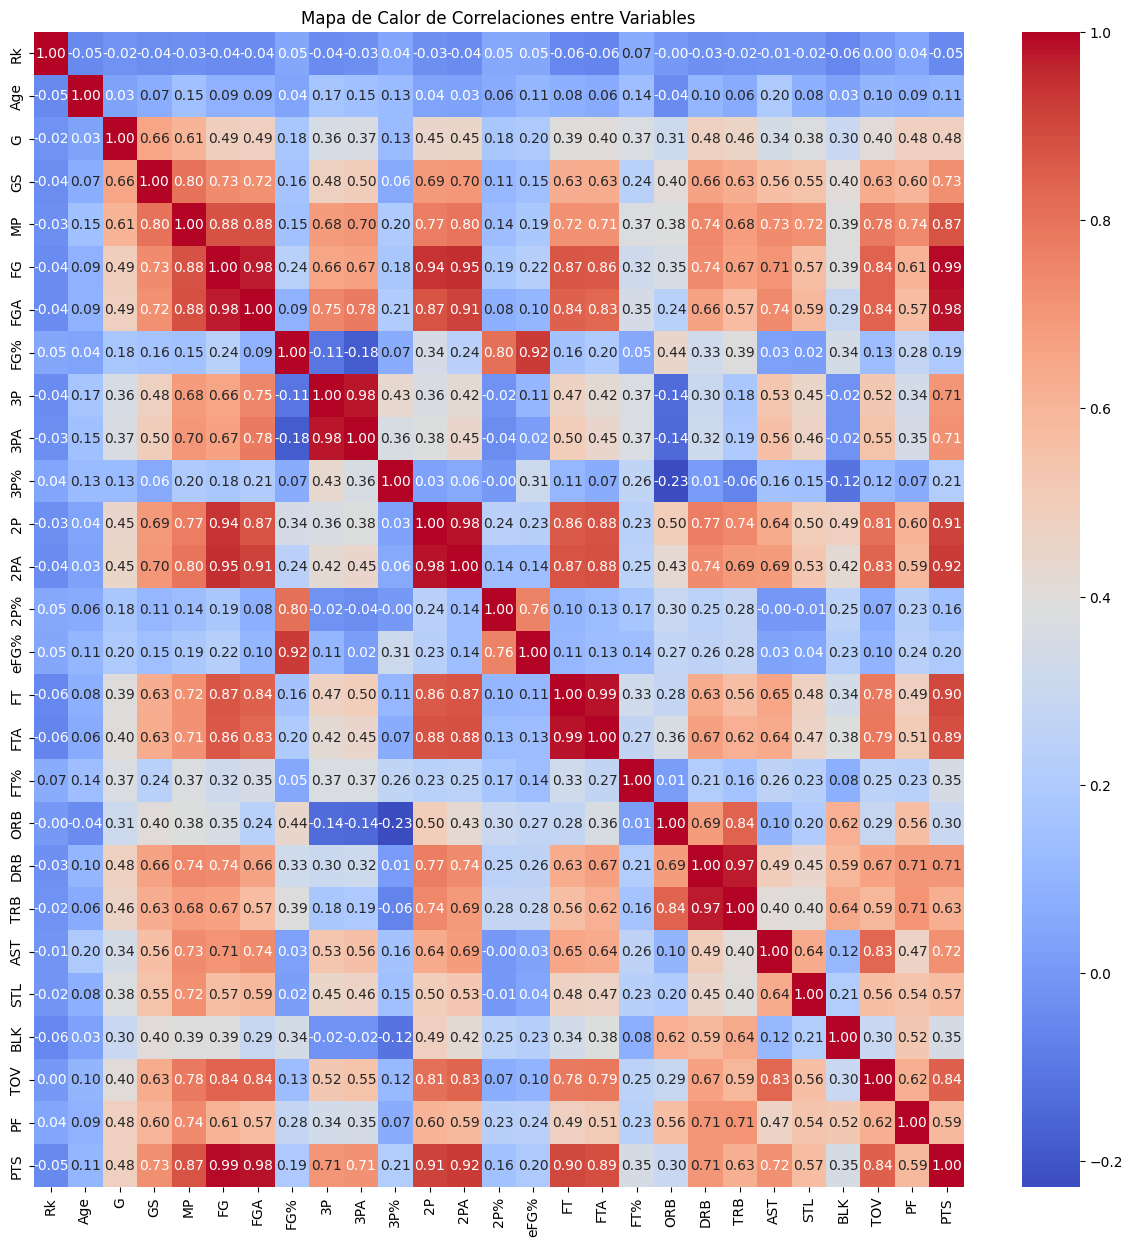

In [22]:
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones entre Variables')
plt.show()


+ **METODOLOGÍA**

De lo anterior nos centramos en la "Eficiencia de Tiro" de los jugadores. Este es un aspecto crucial en el baloncesto, ya que una alta eficiencia de tiro suele ser indicativa de un buen rendimiento tanto a nivel individual como de equipo. 

Y proponemos la creación de una nueva variable llamada eficiencia global EFF, que contemplan variables que pueden describir este atributo fundamental. Su cinstrucción será: 

EFF=PTS+TRB+AST+STL+BLK−(FGA−FG)−(FTA−FT)−TOV

 Tiene en cuenta los puntos anotados, los rebotes, las asistencias, los robos y los bloqueos, y resta los intentos de tiro fallidos, los tiros libres fallidos y las pérdidas de balón. Es una medida integral que intenta capturar la contribución general de un jugador al juego.

. Basándonos en esto, postulamos un análisis exploratorio: 

- 1. Existe una correlación positiva fuerte entre el porcentaje de tiro efectivo (eFG%) y los puntos anotados por juego (PTS) para los jugadores.

- 2.  Varía significativamente el porcentaje de tiro efectivo (eFG%) entre las diferentes posiciones de los jugadores (C, PF, SF, SG, PG)

- 3.  Hay equipos que se destaquen por tener una mayor eficiencia de tiro promedio (eFG%) en comparación con otros

- 4. ¿Existen equipos cuyos jugadores tengan, en promedio, un mayor porcentaje de tiro efectivo (eFG%)? Esto podría indicar mejores estrategias de selección de tiros o habilidades de equipo en general. 

- 5.  Existe una relación entre la Eficiencia Global (EFF) y el tiempo de juego (Minutos por Juego - MP)

- 6. Existe una relación entre la  tiro efectivo (eFG%) y porcentaje de tiro en el juego (FG) y (2P)%






## Correlación entre la eficiencia de tiro (eFG%) y los puntos anotados por juego (PTS)

**Gráfico de dispersión para eFG% vs. PTS**

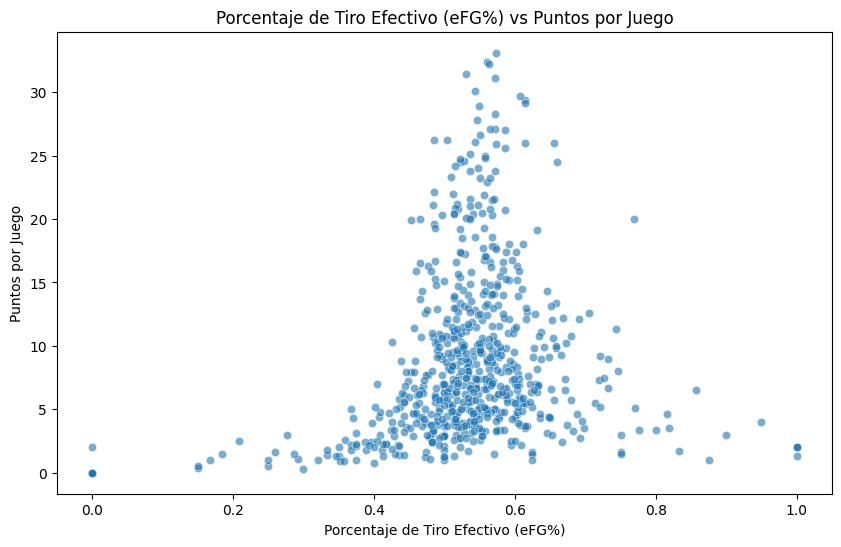

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='eFG%', y='PTS', alpha=0.6)
plt.title('Porcentaje de Tiro Efectivo (eFG%) vs Puntos por Juego')
plt.xlabel('Porcentaje de Tiro Efectivo (eFG%)')
plt.ylabel('Puntos por Juego')
plt.show()

El gráfico de dispersión muestra la relación entre el Porcentaje de Tiro Efectivo (eFG%) y los Puntos por Juego (PTS). Parece haber una tendencia positiva: a medida que el eFG% aumenta, también lo hacen los puntos por juego en general, lo que sugiere una correlación positiva entre estas dos métricas. Jugadores con un eFG% más alto tienden a anotar más puntos por juego.

## Impacto de la posición del jugador en la eficiencia de tiro (eFG%)

**Gráfico de caja para eFG% por posición**

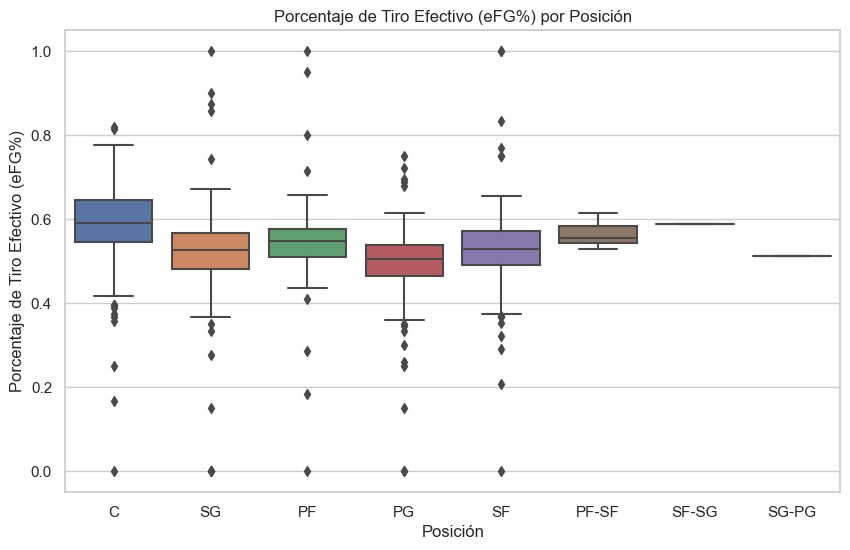

In [84]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pos', y='eFG%')
plt.title('Porcentaje de Tiro Efectivo (eFG%) por Posición')
plt.xlabel('Posición')
plt.ylabel('Porcentaje de Tiro Efectivo (eFG%)')
plt.show()

El gráfico de caja muestra la distribución del Porcentaje de Tiro Efectivo (eFG%) por posición de los jugadores. Podemos observar diferencias en la eficiencia de tiro entre las distintas posiciones:

* Las posiciones de Centro (C) y Ala-Pívot (PF) tienden a tener medianas de eFG% más altas, lo cual podría ser indicativo de que estos jugadores toman tiros más cercanos al aro, generalmente con una mayor probabilidad de acierto.

* Las posiciones de Guardia (SG, PG) y Alero (SF) muestran una mayor variabilidad en su eficiencia de tiro, con algunas excepciones de jugadores con eFG% muy alto.

## Comparación de la eficiencia de tiro entre equipos


In [87]:

# Calculando el eFG% promedio por equipo
team_efg_avg = df.groupby('Tm')['eFG%'].mean().sort_values()
team_efg_avg

Tm
BRK    0.478760
WAS    0.492217
HOU    0.502444
DET    0.505591
CHO    0.511526
SAS    0.517174
LAL    0.522917
MIA    0.523700
PHI    0.524190
POR    0.525167
SAC    0.525650
BOS    0.527944
PHO    0.528250
ATL    0.529050
IND    0.529300
MEM    0.531579
NOP    0.532882
UTA    0.535783
MIL    0.535810
TOT    0.537629
OKC    0.538211
NYK    0.540647
TOR    0.540900
LAC    0.542905
ORL    0.546300
DEN    0.549111
CHI    0.566056
CLE    0.567611
MIN    0.573250
GSW    0.573722
DAL    0.582826
Name: eFG%, dtype: float64

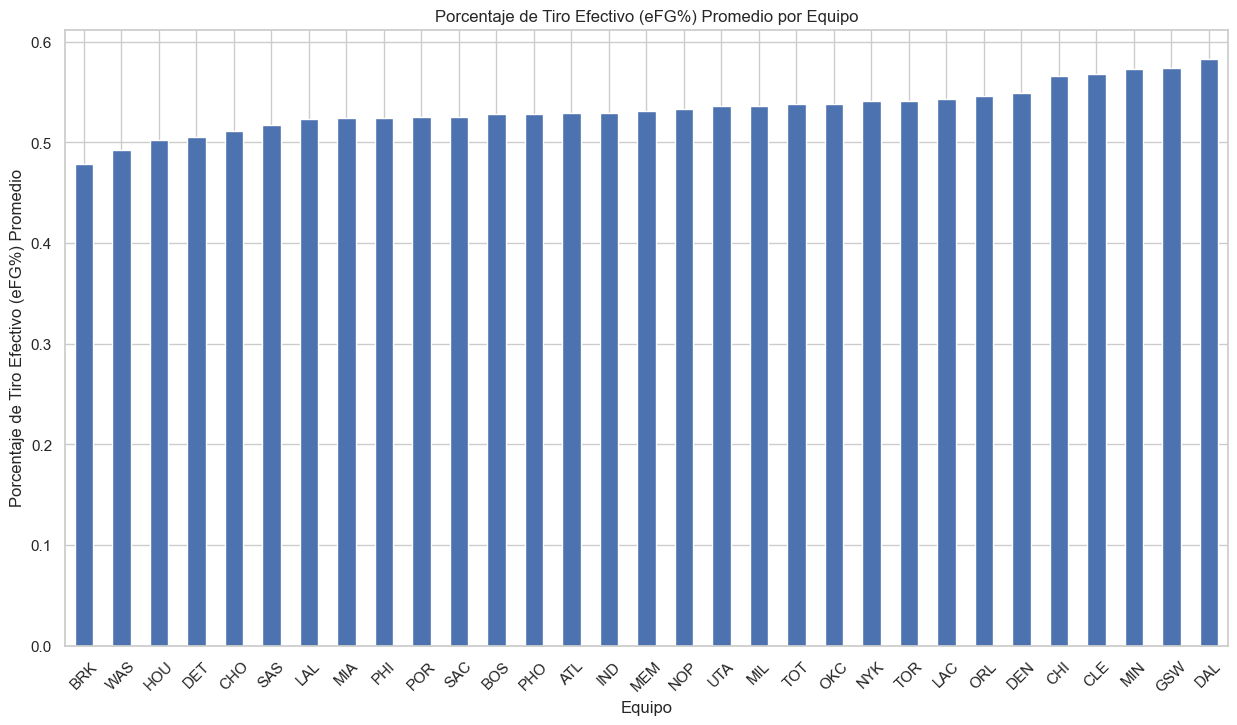

In [88]:
# Gráfico de barras para eFG% promedio por equipo
plt.figure(figsize=(15, 8))
team_efg_avg.plot(kind='bar')
plt.title('Porcentaje de Tiro Efectivo (eFG%) Promedio por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Porcentaje de Tiro Efectivo (eFG%) Promedio')
plt.xticks(rotation=45)
plt.show()

El gráfico de barras muestra el Porcentaje de Tiro Efectivo (eFG%) promedio de cada equipo en la NBA para la temporada 2022-2023. Podemos observar una variación significativa entre los equipos en términos de eficiencia de tiro:

Algunos equipos destacan por tener un eFG% promedio notablemente alto, lo que sugiere una mayor eficiencia en la selección de tiros o en la habilidad de tiro de sus jugadores.
Por otro lado, hay equipos con un eFG% promedio más bajo, lo que podría indicar una selección de tiros menos eficiente o desafíos en la precisión del tiro.

Este análisis proporciona una visión interesante de cómo la eficiencia de tiro varía no solo entre jugadores individuales y posiciones, sino también a nivel de equipo, lo cual es crucial para las estrategias de juego y la evaluación del rendimiento del equipo.


## Relación entre la Eficiencia Global (EFF) y el tiempo de juego (Minutos por Juego - MP)

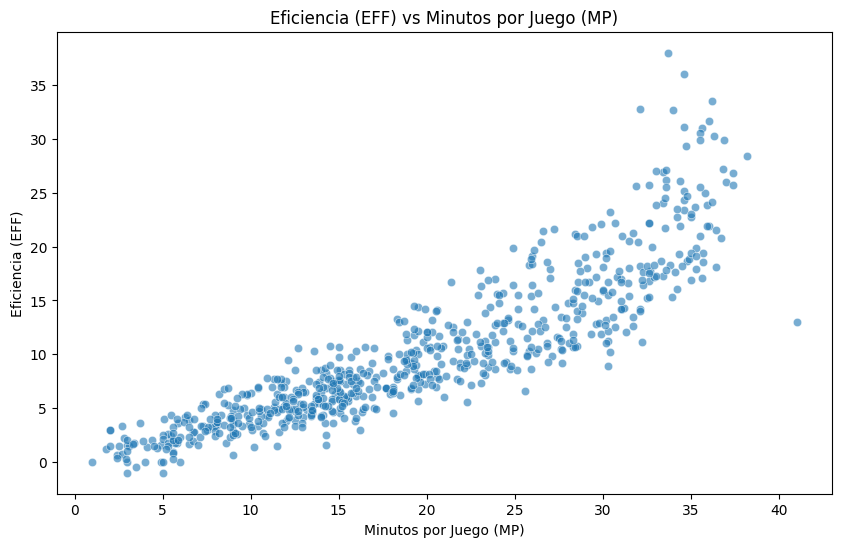

In [24]:
# Creacion de la variable de eficiencia global
df['EFF'] = (df['PTS'] + df['TRB'] + df['AST'] + 
                   df['STL'] + df['BLK'] - 
                   (df['FGA'] - df['FG']) - 
                   (df['FTA'] - df['FT']) - 
                   df['TOV'])

# Relación entre la Eficiencia Global (EFF) y el tiempo de juego (Minutos por Juego - MP)

# Gráfico de dispersión para EFF vs. MP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MP', y='EFF', alpha=0.6)
plt.title('Eficiencia (EFF) vs Minutos por Juego (MP)')
plt.xlabel('Minutos por Juego (MP)')
plt.ylabel('Eficiencia (EFF)')
plt.show()


El gráfico de dispersión muestra la relación entre la Eficiencia (EFF) y los Minutos por Juego (MP). Observamos lo siguiente:

Existe una tendencia positiva, indicando que los jugadores con más minutos en la cancha tienden a tener una mayor eficiencia. Esto tiene sentido, ya que los jugadores que pasan más tiempo en juego suelen tener más oportunidades de contribuir positivamente en varios aspectos del juego.
Sin embargo, también hay una considerable variabilidad, especialmente en rangos medios de minutos jugados. Algunos jugadores con un tiempo de juego moderado muestran una alta eficiencia, lo que podría indicar un impacto significativo durante el tiempo que están en la cancha.
Esta medida de eficiencia proporciona una visión integral de la contribución de un jugador, combinando aspectos ofensivos y defensivos, así como la eficiencia en el tiro.

In [25]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Age_Cat,EFF
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,0.5,2.0,0.269,3.0,5.4,0.564,0.521,1.6,2.3,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,Joven,11.7
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,0.597,1.1,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,Mediana Edad,17.9
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,0.0,0.2,0.083,8.0,14.7,0.545,0.541,4.3,5.4,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,Mediana Edad,24.3
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,1.4,3.9,0.355,1.4,2.7,0.532,0.532,0.9,1.2,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,Joven,7.0
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,1.2,3.5,0.353,2.0,3.4,0.591,0.560,1.4,1.9,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,Joven,11.4


## Hipótesis Desarrolo

1. Eficiencia Global  y Edad Categorizada (joven, Mayor)
2. Eficiencia y Posición
3. Minutos jugados y efectividad (FG%)
4. Distribución de normalidad (FG%)

1. Eficiencia Global  y Edad categorica ----> T de Student

**H0**: No hay evidencia significativa en la eficiencia global entre los diferentes grupos hetareos.

**H1**: Existe una diferencia significativa entre la eficiencia global entre diferentes grupos hetareos.

2. Eficiencia Global Vs Posición ----> ANOVA

**H0**: No hay diferencias significativas en la Eficiencia Global  entre las diferentes posiciones de los jugadores

**H1** : Existe una diferencia significativa entre la Eficiencia Global  entre las diferentes posiciones de los jugadores

3. 2P% Vs efectividad (eFG%) ----> Correlación de Pearson

**H0**: No hay correlación entre los porcentaje de tiros de dos puntos y la  efctividad (eFG%).

**H1**: Existe una diferencia significativa entre los porcentaje de tiros de dos puntos y la  Efectividad (eFG%). 

4. Normalidad ----> Shapiro-Wilk o D'Agostino's K-squared.

**H0**: La distribución de las columnas numéricas sigue una distribución normal.

**H1**: La distribución de las columnas numéricas NO sigue una distribución normal.

In [41]:
# 1.

p_h = df[df['Age_Cat']=='Joven']['EFF']
p_m = df[df['Age_Cat']=='Mayor']['EFF']

ttest = stats.ttest_ind(p_h, p_m)
ttest

if ttest[1] < 0.05:
    print('Rechazamos la hipótesis nula, es decir "Existe una diferencia significativa entre la eficiencia global entre diferentes grupos hetareos"')
else:
    print('No rechazamos la hipótesis nula')

Rechazamos la hipótesis nula, es decir "Existe una diferencia significativa entre la eficiencia global entre diferentes grupos hetareos"


In [32]:
#2.

grupos_posiciones = df.groupby('Pos')['EFF']
C = grupos_posiciones.get_group('C')
PG = grupos_posiciones.get_group('PG')
SG = grupos_posiciones.get_group('SG')

anova = stats.f_oneway(C, PG, SG)
anova

if anova[1] < 0.05:
    print('Rechazamos la hipótesis nula "No hay diferencias significativas en la Eficiencia Global  entre las diferentes posiciones de los jugadores"')
else:
    print('No rechazamos la hipótesis nula')

Rechazamos la hipótesis nula "No hay diferencias significativas en la Eficiencia Global  entre las diferentes posiciones de los jugadores"


In [36]:
anova

F_onewayResult(statistic=7.67631138047051, pvalue=0.0005302580225856736)

In [39]:
#3.

puntos = df['2P%']
efectividad = df['eFG%']

correlacion , pv = stats.pearsonr(puntos, efectividad)
correlacion, pv

if pv < 0.05:
    print('Rechazamos la hipótesis nula, es decir "Existe una diferencia significativa entre los porcentaje de tiros de dos puntos y la  Efectividad (eFG%)."')
else:
    print('No rechazamos la hipótesis nula')

Rechazamos la hipótesis nula, es decir "Existe una diferencia significativa entre los porcentaje de tiros de dos puntos y la  Efectividad (eFG%)."


In [40]:
correlacion, pv

(0.7558087131022868, 1.2876186193616757e-126)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Rk       679 non-null    int64   
 1   Player   679 non-null    object  
 2   Pos      679 non-null    object  
 3   Age      679 non-null    int64   
 4   Tm       679 non-null    object  
 5   G        679 non-null    int64   
 6   GS       679 non-null    int64   
 7   MP       679 non-null    float64 
 8   FG       679 non-null    float64 
 9   FGA      679 non-null    float64 
 10  FG%      679 non-null    float64 
 11  3P       679 non-null    float64 
 12  3PA      679 non-null    float64 
 13  3P%      679 non-null    float64 
 14  2P       679 non-null    float64 
 15  2PA      679 non-null    float64 
 16  2P%      679 non-null    float64 
 17  eFG%     679 non-null    float64 
 18  FT       679 non-null    float64 
 19  FTA      679 non-null    float64 
 20  FT%      679 non-null    float64

In [48]:
variables_num = df.select_dtypes(exclude=['object', 'category'])
shapiro = {var: stats.shapiro(variables_num[var]) for var in variables_num.columns}

print(shapiro)

for var in variables_num.columns:
    if shapiro[var][1] < 0.05:
        print(f'Rechazamos la hipótesis nula "No Hay evidencia significativa en la normalidad de la variable {var}"')
    else:
        print(f'No rechazamos la hipótesis nula "No hay evidencia significativa en la normalidad de la variable {var}"')


{'Rk': ShapiroResult(statistic=0.9547226428985596, pvalue=1.3420932117383377e-13), 'Age': ShapiroResult(statistic=0.9516538381576538, pvalue=4.0358832947709825e-14), 'G': ShapiroResult(statistic=0.939297080039978, pvalue=5.1302657444913e-16), 'GS': ShapiroResult(statistic=0.7605459094047546, pvalue=3.0361499402642943e-30), 'MP': ShapiroResult(statistic=0.9685537815093994, pvalue=6.760644821746098e-11), 'FG': ShapiroResult(statistic=0.8980210423469543, pvalue=7.883570035939507e-21), 'FGA': ShapiroResult(statistic=0.8999933004379272, pvalue=1.2312371775937277e-20), 'FG%': ShapiroResult(statistic=0.8941872119903564, pvalue=3.374276513756938e-21), '3P': ShapiroResult(statistic=0.9113427996635437, pvalue=1.8328414688887393e-19), '3PA': ShapiroResult(statistic=0.9309402108192444, pvalue=3.779087786756304e-17), '3P%': ShapiroResult(statistic=0.8388959765434265, pvalue=1.215709843250608e-25), '2P': ShapiroResult(statistic=0.8646515011787415, pvalue=9.568006355865173e-24), '2PA': ShapiroResult(